In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import numpy as np
import os
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('Toronto_apartment_rentals_2018.csv')
df.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,"$2,450"
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,"$2,150"
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,"$1,950"
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,"$2,900"
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,"$1,800"


# Remove dollar signs and commas from the price column

In [3]:
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = df['Price'].str.replace('$', '')
#df['Price'] = df['Price'].str.replace('(.).*', '')
df['Price'] = df['Price'].astype(int)

In [4]:
df

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,2450
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,2150
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,1950
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,2900
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,1800
...,...,...,...,...,...,...,...
1119,3,1.0,0,", L7S 1R7, Burlington, ON",43.325233,-79.802182,3000
1120,1,1.0,0,", oakville L6M3V5 ON, Canada",43.445426,-79.736833,1200
1121,1,1.0,0,"Upper Beaches, Toronto, ON, Canada, M4C 1B4",43.683386,-79.309409,1800
1122,2,1.0,0,", Toronto M5B 2L7 ON, Canada",43.653636,-79.380873,2200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Bedroom   1124 non-null   int64  
 1   Bathroom  1124 non-null   float64
 2   Den       1124 non-null   int64  
 3   Address   1124 non-null   object 
 4   Lat       1124 non-null   float64
 5   Long      1124 non-null   float64
 6   Price     1124 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 61.6+ KB


In [6]:
df.describe()

,Bedroom,Bathroom,Den,Lat,Long,Price
count,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000
mean,1.370107,1.237544,0.153025,43.703532,-79.500326,3627.912811
std,0.553493,0.431997,0.360172,0.692689,1.760654,27530.542058
min,1.000000,1.000000,0.000000,42.985767,-114.082215,65.000000
25%,1.000000,1.000000,0.000000,43.641355,-79.414319,1759.250000
50%,1.000000,1.000000,0.000000,43.650560,-79.387295,2100.000000
75%,2.000000,1.000000,0.000000,43.666613,-79.377198,2500.000000
max,3.000000,3.000000,1.000000,56.130366,-73.576385,535000.000000


<AxesSubplot:>

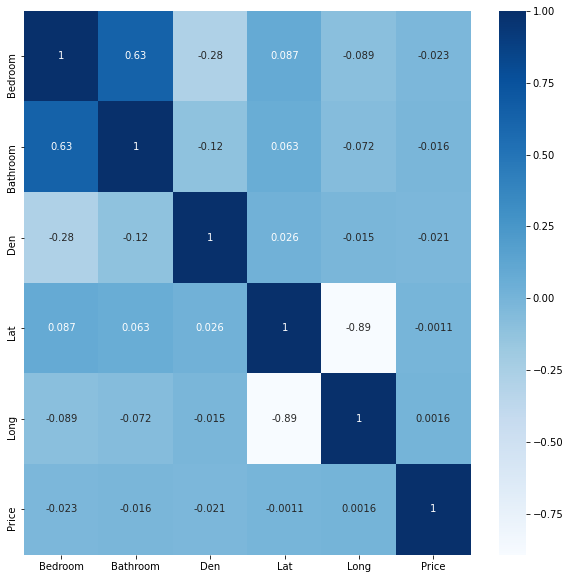

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

# Remove outliers outside the 99th percentile

In [9]:
q = df["Price"].quantile(0.99)

In [10]:
df = df[df["Price"] < q]

In [11]:
# How does the amount of bedrooms affect other variables?

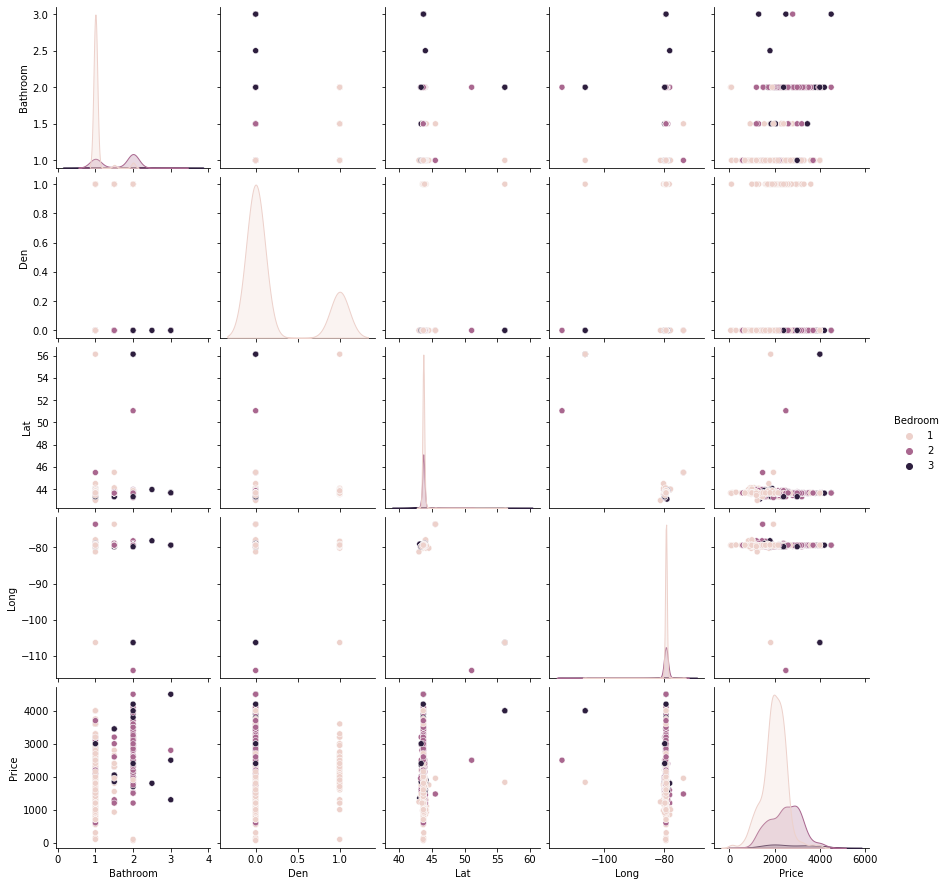

In [12]:
sns.pairplot(df, hue="Bedroom")

In [13]:
#Correlation of bathrooms and price = more bathrooms and the price increases

Text(0, 0.5, 'Price')

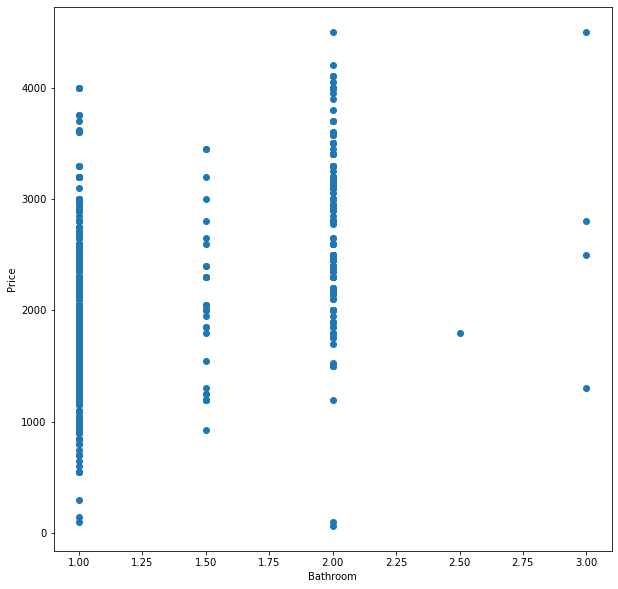

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(x='Bathroom',y='Price',data=df)
plt.xlabel('Bathroom')
plt.ylabel('Price')

<AxesSubplot:xlabel='Price'>

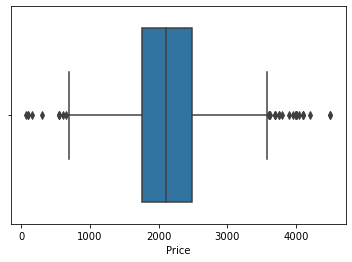

In [15]:
sns.boxplot(df['Price'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

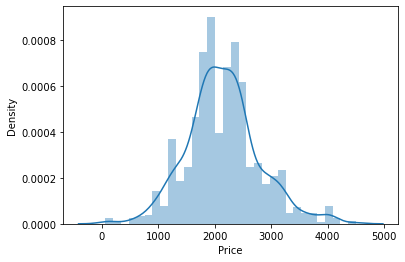

In [16]:
sns.distplot(df['Price'])

In [17]:
#Scatterplot

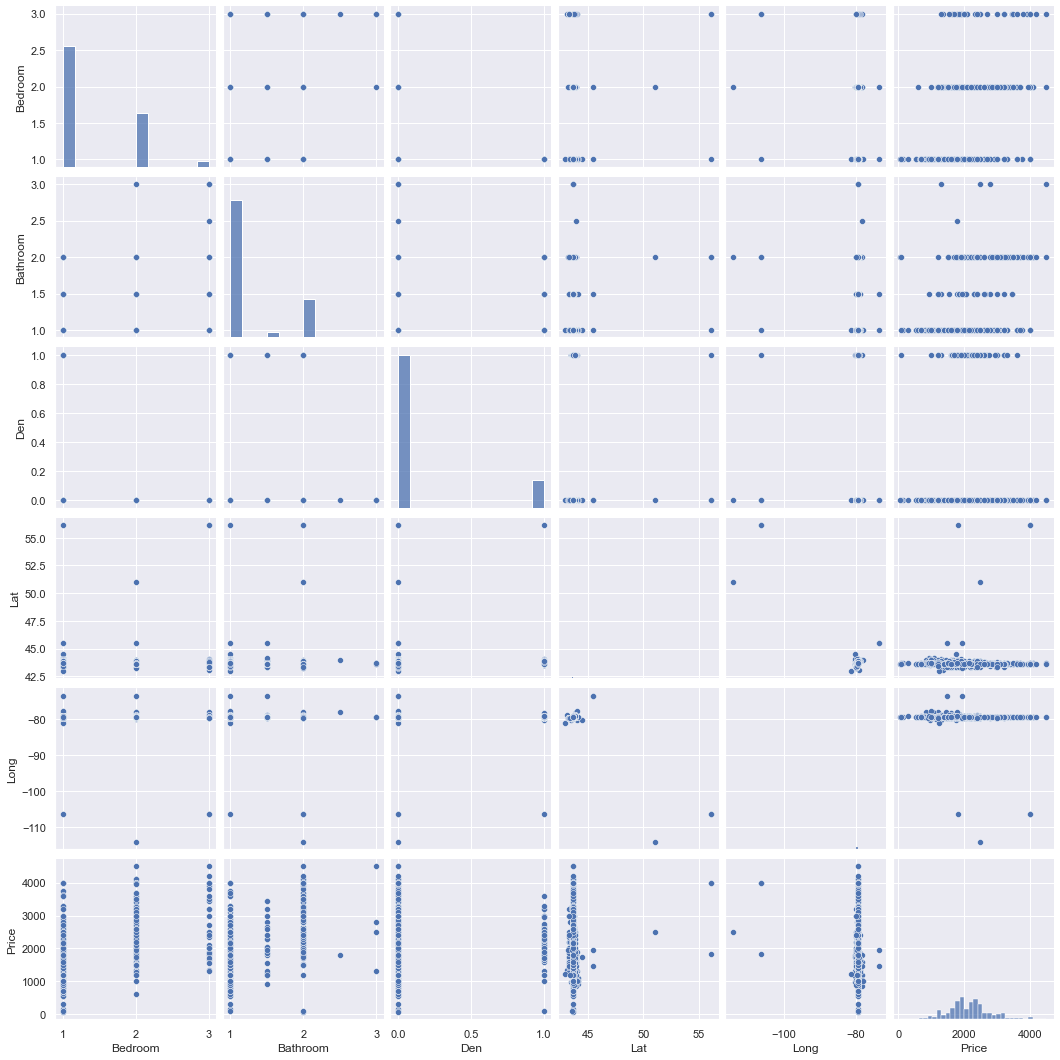

In [18]:
sns.set()
cols = ['Bedroom', 'Bathroom', 'Den', 'Lat', 'Long', 'Price']
sns.pairplot(df[cols], size = 2.5)
plt.show();

# Feature Engineering

In [19]:
df

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,2450
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,2150
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,1950
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,2900
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,1800
...,...,...,...,...,...,...,...
1119,3,1.0,0,", L7S 1R7, Burlington, ON",43.325233,-79.802182,3000
1120,1,1.0,0,", oakville L6M3V5 ON, Canada",43.445426,-79.736833,1200
1121,1,1.0,0,"Upper Beaches, Toronto, ON, Canada, M4C 1B4",43.683386,-79.309409,1800
1122,2,1.0,0,", Toronto M5B 2L7 ON, Canada",43.653636,-79.380873,2200


In [20]:
#Extract all rows with Mississauga

In [21]:
df_Miss = df[df['Address'].str.contains('Mississauga')]
df_Miss

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,2450
18,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,2450
44,1,1.0,0,"Downtown Port Credit, Mississauga, ON, L5G 1G4",43.558352,-79.578869,1727
64,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,2450
89,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,2450
106,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,2450
109,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,2300
113,2,2.0,0,"2155 Burnhamthorpe Rd W, Mississauga, ON L5L 5...",43.546487,-79.685416,2350
114,1,1.0,0,"3525 Kariya Dr, Mississauga, ON L5B 0C1, Canada",43.588602,-79.631700,1900
116,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,2450


In [22]:
#Make the Address type string

In [23]:
df['Address'] = df['Address'].astype('string')

In [24]:
df

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,2450
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,2150
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,1950
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,2900
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,1800
...,...,...,...,...,...,...,...
1119,3,1.0,0,", L7S 1R7, Burlington, ON",43.325233,-79.802182,3000
1120,1,1.0,0,", oakville L6M3V5 ON, Canada",43.445426,-79.736833,1200
1121,1,1.0,0,"Upper Beaches, Toronto, ON, Canada, M4C 1B4",43.683386,-79.309409,1800
1122,2,1.0,0,", Toronto M5B 2L7 ON, Canada",43.653636,-79.380873,2200


In [25]:
#Get the postcode out of the address

In [26]:
df['postcode'] = df['Address'].str.extract(r'([A-Z]+[0-9]+[A-Z])')

In [27]:
df

,Bedroom,Bathroom,Den,Address,Lat,Long,Price,postcode
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,2450,L5B
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,2150,M5V
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,1950,M5B
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,2900,M5J
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,1800,M5T
...,...,...,...,...,...,...,...,...
1119,3,1.0,0,", L7S 1R7, Burlington, ON",43.325233,-79.802182,3000,L7S
1120,1,1.0,0,", oakville L6M3V5 ON, Canada",43.445426,-79.736833,1200,L6M
1121,1,1.0,0,"Upper Beaches, Toronto, ON, Canada, M4C 1B4",43.683386,-79.309409,1800,M4C
1122,2,1.0,0,", Toronto M5B 2L7 ON, Canada",43.653636,-79.380873,2200,M5B


In [28]:
#get average price per postcode from the data and show the count of the postcodes in the addresses (occurence)

In [29]:
new_column = df["postcode"].value_counts()
df['Occurence'] = df['postcode'].map(new_column)

In [30]:
df1 = df.groupby('postcode')['Price', 'Bedroom', 'Bathroom', 'Den', 'Occurence'].mean()

In [31]:
df1

,Price,Bedroom,Bathroom,Den,Occurence
postcode,,,,,
H2X,1953.0,1.000000,1.500000,0.000000,1.0
H3H,1475.0,2.000000,1.000000,0.000000,1.0
K0K,1000.0,1.000000,1.000000,0.000000,1.0
K9A,1270.0,1.800000,1.500000,0.000000,5.0
L1A,1200.0,1.000000,1.000000,1.000000,1.0
...,...,...,...,...,...
M9C,2290.0,1.833333,1.666667,0.166667,6.0
M9N,1742.0,1.818182,1.136364,0.000000,11.0
N1H,975.0,1.000000,1.000000,0.000000,1.0


In [32]:
#Sort by price

In [33]:
df1.sort_values('Price')

,Price,Bedroom,Bathroom,Den,Occurence
postcode,,,,,
L6Z,900.000000,1.000000,1.000000,0.000000,1.0
M5N,900.000000,1.000000,1.000000,0.000000,1.0
N1H,975.000000,1.000000,1.000000,0.000000,1.0
K0K,1000.000000,1.000000,1.000000,0.000000,1.0
L3Z,1045.000000,1.000000,1.100000,0.000000,5.0
...,...,...,...,...,...
T2P,2500.000000,2.000000,2.000000,0.000000,1.0
M2K,2625.000000,2.000000,2.000000,0.000000,2.0
M5E,2684.210526,1.447368,1.434211,0.157895,38.0


In [34]:
#Sort by occurence to see which postcode features the most

In [35]:
df1.sort_values('Occurence')

,Price,Bedroom,Bathroom,Den,Occurence
postcode,,,,,
H2X,1953.000000,1.000000,1.500000,0.000000,1.0
L6M,1200.000000,1.000000,1.000000,0.000000,1.0
L6T,1780.000000,2.000000,2.000000,0.000000,1.0
L6Z,900.000000,1.000000,1.000000,0.000000,1.0
L8N,1950.000000,2.000000,2.000000,0.000000,1.0
...,...,...,...,...,...
M5B,2363.950820,1.459016,1.327869,0.032787,61.0
M5A,2330.191176,1.235294,1.250000,0.264706,68.0
M4Y,2346.691176,1.250000,1.191176,0.058824,68.0


In [36]:
#scatterplot of feature engineered section

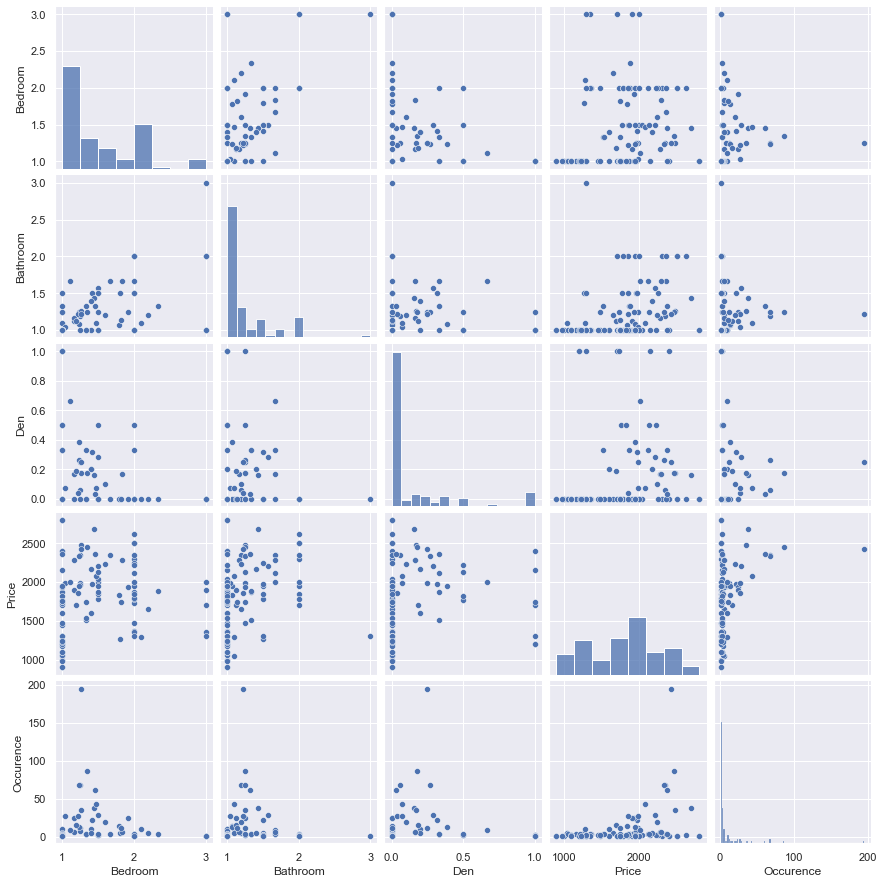

In [37]:
sns.set()
columns = ['Bedroom', 'Bathroom', 'Den', 'Price', 'Occurence']
sns.pairplot(df1[columns], size = 2.5)
plt.show();

In [38]:
#Remove decimal point

In [39]:
df1.style.set_precision(1)

,Price,Bedroom,Bathroom,Den,Occurence
postcode,,,,,
H2X,1953.0,1.0,1.5,0.0,1.0
H3H,1475.0,2.0,1.0,0.0,1.0
K0K,1000.0,1.0,1.0,0.0,1.0
K9A,1270.0,1.8,1.5,0.0,5.0
L1A,1200.0,1.0,1.0,1.0,1.0
L1C,1850.0,2.0,2.0,0.0,1.0
L1G,1649.0,2.2,1.2,0.0,5.0
L1H,1285.0,2.1,1.1,0.0,10.0
L1J,1365.0,2.0,1.0,0.0,3.0


In [40]:
df1.reset_index(inplace = True)

In [41]:
df1

,postcode,Price,Bedroom,Bathroom,Den,Occurence
0,H2X,1953.0,1.000000,1.500000,0.000000,1.0
1,H3H,1475.0,2.000000,1.000000,0.000000,1.0
2,K0K,1000.0,1.000000,1.000000,0.000000,1.0
3,K9A,1270.0,1.800000,1.500000,0.000000,5.0
4,L1A,1200.0,1.000000,1.000000,1.000000,1.0
...,...,...,...,...,...,...
103,M9C,2290.0,1.833333,1.666667,0.166667,6.0
104,M9N,1742.0,1.818182,1.136364,0.000000,11.0
105,N1H,975.0,1.000000,1.000000,0.000000,1.0
106,N6B,1235.0,1.000000,1.000000,0.000000,1.0


# Linear Regression

In [42]:
x = df.drop(['Price', 'Occurence', 'Address', 'postcode'], axis =1)
x

,Bedroom,Bathroom,Den,Lat,Long
0,2,2.0,0,43.581639,-79.648193
1,1,1.0,1,43.643051,-79.391643
2,1,1.0,0,43.660605,-79.378635
3,2,2.0,0,43.641087,-79.381405
4,1,1.0,0,43.652487,-79.389622
...,...,...,...,...,...
1119,3,1.0,0,43.325233,-79.802182
1120,1,1.0,0,43.445426,-79.736833
1121,1,1.0,0,43.683386,-79.309409
1122,2,1.0,0,43.653636,-79.380873


In [43]:
y = df['Price']
y

0       2450
1       2150
2       1950
3       2900
4       1800
        ... 
1119    3000
1120    1200
1121    1800
1122    2200
1123    2150
Name: Price, Length: 1112, dtype: int64

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=32)

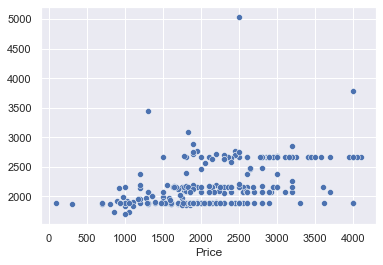

In [45]:
model = LinearRegression()

model.fit(x_train, y_train)

yPred= model.predict(x_test)

sns.scatterplot(x=y_test, y=yPred)

plt.show()

In [46]:
rmse = np.sqrt(mean_squared_error(y_test, yPred))

r2 = r2_score(y_test, yPred)


print ('rmse = ', rmse)
print ('r2 ', r2)

rmse =  591.1528096518364
r2  0.20578829995987302


In [47]:
#Polynomial features

In [48]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)
lr_poly=LinearRegression()
lr_poly.fit(x_poly,y)

LinearRegression()

In [49]:
lr_poly.score(x_poly,y)

0.32844695907845955

# Create a Random Forest Regressor

In [50]:
reg1 = RandomForestRegressor()

# Train the model using the training sets 
reg1.fit(x_train, y_train)

RandomForestRegressor()

In [51]:
# Model prediction on train data
y_pred = reg1.predict(x_train)

In [52]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.914358085661788
Adjusted R^2: 0.913778641045156
MAE: 112.86911118531644
MSE: 34639.554265145016
RMSE: 186.11704453151253


In [53]:
# Predicting Test data with the model
y_test_pred = reg1.predict(x_test)

In [54]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.4931918576040808
Adjusted R^2: 0.4861723542467966
MAE: 290.35643536830395
MSE: 223001.0044014608
RMSE: 472.2298215926868


# XGBRegressor

In [55]:
#Create a XGBoost Regressor
reg2 = XGBRegressor()

# Train the model using the training sets 
reg2.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
# Model prediction on train data
y_pred = reg2.predict(x_train)

In [57]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9576132814073985
Adjusted R^2: 0.9573264971138086
MAE: 63.92107391357422
MSE: 17144.14081184006
RMSE: 130.9356361417321


In [58]:
#Predicting Test data with the model
y_test_pred = reg2.predict(x_test)

In [59]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.4657064264889025
Adjusted R^2: 0.45830623849013385
MAE: 287.8985539574064
MSE: 235094.8881266038
RMSE: 484.8658454939921


In [60]:
# Creating scaled set to be used in model to improve our results
#sc = StandardScaler()
#X_train = sc.fit_transform(x_train)
#X_test = sc.transform(x_test)

# Create a SVM Regressor

In [61]:
reg3 = svm.SVR()

In [62]:
# Train the model using the training sets 
reg3.fit(x_train, y_train)

SVR()

In [63]:
# Model prediction on train data
y_pred = reg3.predict(x_train)

In [64]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: -0.004114305372390881
Adjusted R^2: -0.010908042215235225
MAE: 484.56684569159114
MSE: 406133.75165804935
RMSE: 637.2862399723136


In [65]:
# Predicting Test data with the model
y_test_pred = reg3.predict(x_test)

# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: -0.007145597067134801
Adjusted R^2: -0.021094982068064816
MAE: 502.4429889402487
MSE: 443154.836981736
RMSE: 665.6987584348765


# Gradient Booster Regression

In [66]:
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [67]:
GBR.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=4)

In [68]:
GBR_result =  GBR.score(x_test, y_test)
GBR_result

0.5001183998010494

# Ridge Regression

In [69]:
#x =df[['Bedroom', 'Bathroom','Den' ,'Lat','Long']]  
#y =df['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)
Rg=Ridge(alpha=0.1)
Rg.fit(x_train_poly,y_train)

Ridge(alpha=0.1)

In [70]:
Rg.score(x_test_poly,y_test)

0.14194481286846916

In [71]:
models = pd.DataFrame({
    'Model': ['GBR', 'Ridge Regression', 'Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [GBR_result*100, Rg.score(x_test_poly,y_test)*100, r2*100, acc_rf*100, acc_xgb*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
0,GBR,50.011840
3,Random Forest,49.319186
4,XGBoost,46.570643
2,Linear Regression,20.578830
1,Ridge Regression,14.194481
5,Support Vector Machines,-0.714560


# Grid Search on GBR

In [72]:
parameters=[{'alpha':[0.001,0.01,0.1,1,10,100,1000,10000,100000,1000000]}]
grid=GridSearchCV(GBR,parameters,cv=4)
grid.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=GradientBoostingRegressor(max_depth=4),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                                    100000, 1000000]}])

In [73]:
bestBGR=grid.best_estimator_
bestBGR

GradientBoostingRegressor(alpha=0.01, max_depth=4)

In [74]:
gbr_gs = grid.best_score_
gbr_gs

0.5425186906246637

# Grid search on Ridge Regression

In [75]:
parameters=[{'alpha':[0.001,0.01,0.1,1,10,100,1000,10000,100000,1000000]}]
grid=GridSearchCV(Rg,parameters,cv=4)
grid.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=Ridge(alpha=0.1),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                                    100000, 1000000]}])

In [76]:
bestRg=grid.best_estimator_
bestRg

Ridge(alpha=10)

In [77]:
rg_gs = grid.best_score_
rg_gs

0.2389239292648451

# Grid search on XGB Regressor

In [78]:
parameters=[{'alpha':[0.001,0.01,0.1,1,10,100,1000,10000,100000,1000000]}]
grid=GridSearchCV(reg2,parameters,cv=4)
grid.fit(x_train,y_train)

GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [79]:
bestReg2=grid.best_estimator_
bestReg2

XGBRegressor(alpha=0.001, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
xgb_gs = grid.best_score_
xgb_gs

0.5113654917968116

# GridSearch Summary

In [81]:
models2 = pd.DataFrame({
    'Model': ['Gradient Booster Regression', 'Ridge Regression', 'Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [GBR_result*100, Rg.score(x_test_poly,y_test)*100, r2*100, acc_rf*100, acc_xgb*100, acc_svm*100],
    'GridSearch Scores': [gbr_gs*100, rg_gs*100, 0, 0, xgb_gs*100, 0]})
models2.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score,GridSearch Scores
0,Gradient Booster Regression,50.011840,54.251869
3,Random Forest,49.319186,0.000000
4,XGBoost,46.570643,51.136549
2,Linear Regression,20.578830,0.000000
1,Ridge Regression,14.194481,23.892393
5,Support Vector Machines,-0.714560,0.000000


# In conclusion, GridSearch improved the models it was applied to. Gradient Booster Regression had the best results with 54% accuracy. Very low in general but not bad considering the data.

